<a href="https://colab.research.google.com/github/kapilpandey09/ML_project/blob/main/Duplicate_predict_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/sample_data/train2.csv")

In [3]:
df.shape

(66069, 6)

In [4]:
 df.shape

(66069, 6)

In [5]:

df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
15154,15154,28976,28977,If the Republican nominee was anyone other tha...,When will Bernie Sanders endorse Hillary Clinton?,0.0
5299,5299,10433,7801,Can I make money online?,What are the easiest ways to earn money online?,1.0
55258,55258,97438,18776,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...,0.0
25250,25250,47076,47077,How is fried ice cream made?,What is fried ice cream?,0.0
33198,33198,61028,61029,"What are the most disturbing sites on the ""dar...",What's the craziest thing that has happened to...,0.0
1685,1685,3355,3356,"How much, if at all, will cotton khakis shrink...",Why does cotton shrink when washed?,0.0
46206,46206,82679,82680,Which encryption key is better for implementin...,What is Apache hive? How can I install Apache ...,0.0
13503,13503,491,25923,How do you get a book published?,How do I get a book published?,1.0
39730,39730,71998,71999,How can I know weather girl is virgin or not?,Can a guy know if the girl is a virgin (or not...,1.0
44073,44073,79188,79189,Where can I get a wide variety of wedding dres...,Where can I found best quality bridesmaid and ...,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66069 entries, 0 to 66068
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            66069 non-null  int64  
 1   qid1          66069 non-null  int64  
 2   qid2          66069 non-null  int64  
 3   question1     66069 non-null  object 
 4   question2     66069 non-null  object 
 5   is_duplicate  66068 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum(

)

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,1


In [8]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0.0    41444
1.0    24624
Name: count, dtype: int64
is_duplicate
0.0    62.729309
1.0    37.270691
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

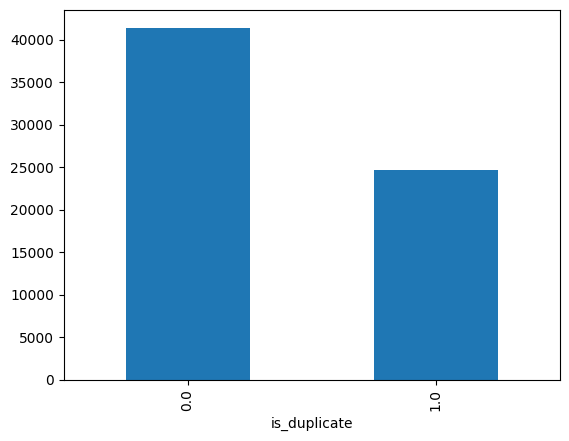

In [9]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique questions", np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repreated', x[x].shape[0])

Number of unique questions 114571
Number of questions getting repreated 11016


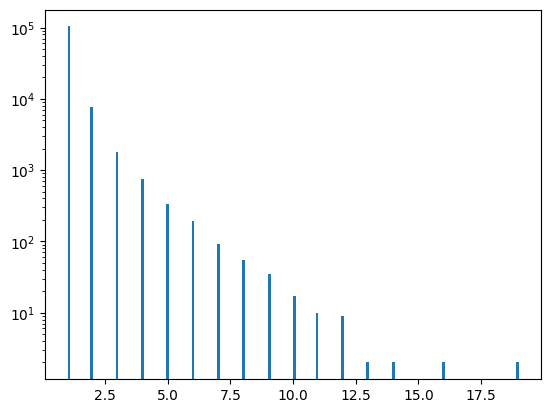

In [11]:
plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()

In [12]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,1


In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [15]:
df.shape

(66068, 6)

In [16]:
ques_df = df[['question1', 'question2']]

In [17]:
ques_df.head()


,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [19]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(66068, 6000)

In [20]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
temp_df['is_duplicate'] = df['is_duplicate']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/sample_data/train2.csv")

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
new_df = df.sample(30000,random_state=2)

In [ ]:
new_df.isnull().sum()

In [ ]:
new_df.duplicated().sum()

In [ ]:
# Distributed of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated', x[x].shape[0])


In [ ]:
# Repeated questions histogram

plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()

In [ ]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
new_df.head()

In [ ]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()


In [ ]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)


In [ ]:
# set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

In [ ]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))


In [ ]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

In [ ]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df

In [ ]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('average number of characters', int(new_df['q1_len'].mean()))

In [ ]:
# Analysis of features
sns.displot(new_df['q2_len'])
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average number of characters', int(new_df['q2_len'].mean()))

In [ ]:
sns.displot(new_df['q1_num_words'])
print('minimum words', new_df['q1_num_words'].min())
print('minimum words', new_df['q1_num_words'].max())
print('average num of words', int(new_df['q1_num_words'].mean()))

In [ ]:
sns.displot(new_df['q2_num_words'])
print('minimum words', new_df['q2_num_words'].min())
print('minimum words', new_df['q2_num_words'].max())
print('average num of words', int(new_df['q2_num_words'].mean()))

In [ ]:
# COMMON WORDS
sns.displot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.displot(new_df[new_df['is_duplicate'] == 1]['word_common'],label ='duplicate',)
plt.legend()
plt.show()

In [ ]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

In [ ]:
final_df = new_df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)